# Demo 2: pandas Plotting and seaborn Statistical Visualization

## Learning Objectives
- Use pandas plotting for quick data exploration
- Create statistical visualizations with seaborn
- Understand when to use pandas vs seaborn
- Apply proper styling and themes

## Setup

Let's import the necessary libraries for pandas plotting and seaborn.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set inline plotting for Jupyter
%matplotlib inline

# Set style
plt.style.use('default')
sns.set_style('whitegrid')

## Part 1: pandas Plotting for Quick Exploration

pandas provides convenient plotting methods built on matplotlib for rapid data exploration.

### Basic pandas Plotting

pandas plotting methods work directly on DataFrames and Series for quick visualization.

,A,B,C
0,0.496714,-1.415371,0.357787
1,-0.138264,-0.420645,0.560785
2,0.647689,-0.342715,1.083051
3,1.523030,-0.802277,1.053802
4,-0.234153,-0.161286,-1.377669
...,...,...,...
95,-1.463515,0.385317,-0.692910
96,0.296120,-0.883857,0.899600
97,0.261055,0.153725,0.307300
98,0.005113,0.058209,0.812862


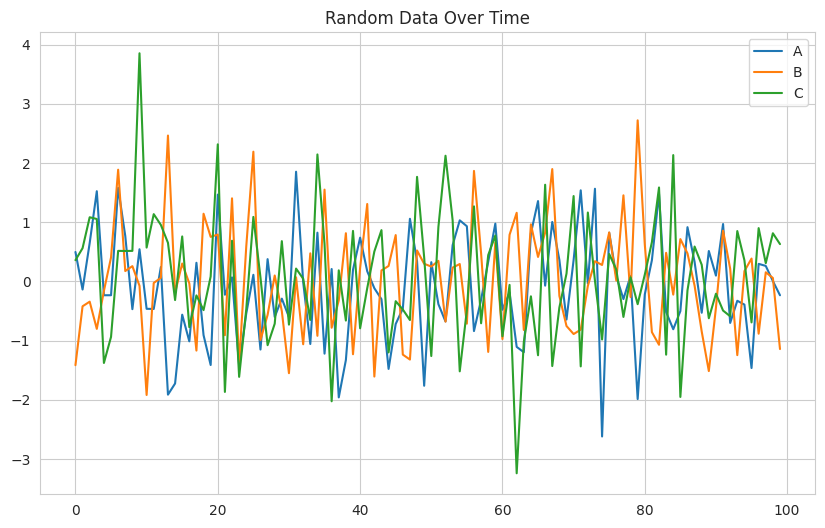

In [2]:
# Create sample data
np.random.seed(42)
df = pd.DataFrame({
    'A': np.random.randn(100),
    'B': np.random.randn(100),
    'C': np.random.randn(100)
})

# Quick line plot
df.plot(figsize=(10, 6), title='Random Data Over Time')
# plt.show()
df

### Multiple Plot Types

pandas supports various plot types through the `kind` parameter.

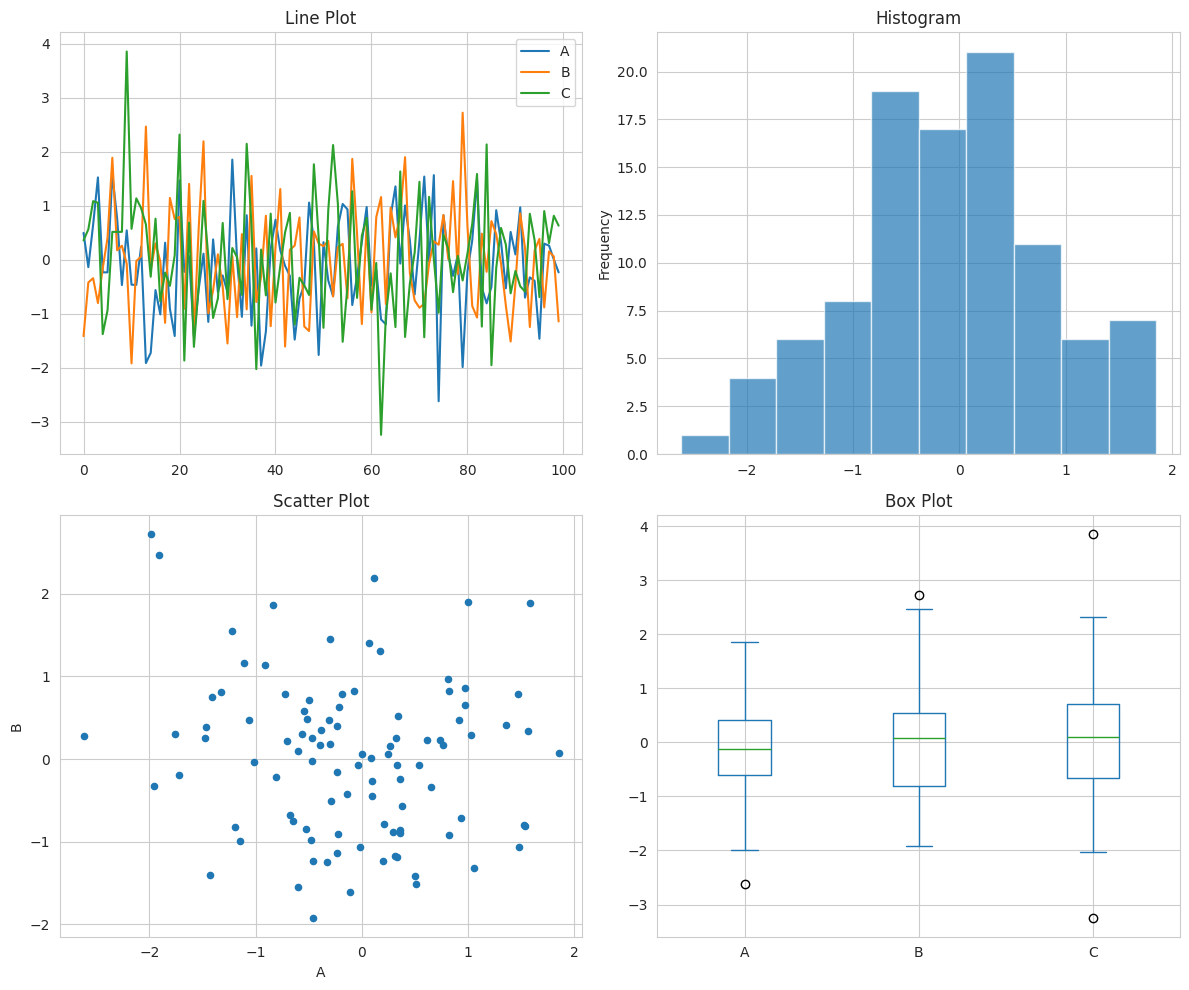

In [3]:
# Create subplots for different plot types
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Line plot
df.plot(ax=axes[0, 0], title='Line Plot')

# Histogram
df['A'].plot(kind='hist', ax=axes[0, 1], alpha=0.7, title='Histogram')

# Scatter plot
df.plot(kind='scatter', x='A', y='B', ax=axes[1, 0], title='Scatter Plot')

# Box plot
df.plot(kind='box', ax=axes[1, 1], title='Box Plot')

plt.tight_layout()
plt.show()

In [4]:
df.plot(kind='hist', ax=axes[0, 1], alpha=0.7, title='Histogram', subplots=True)

/tmp/ipykernel_1426218/4279320356.py:1: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.plot(kind='hist', ax=axes[0, 1], alpha=0.7, title='Histogram', subplots=True)


array([<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>], dtype=object)

### DataFrame Plotting Options

Use subplots and customization options for better visualization.

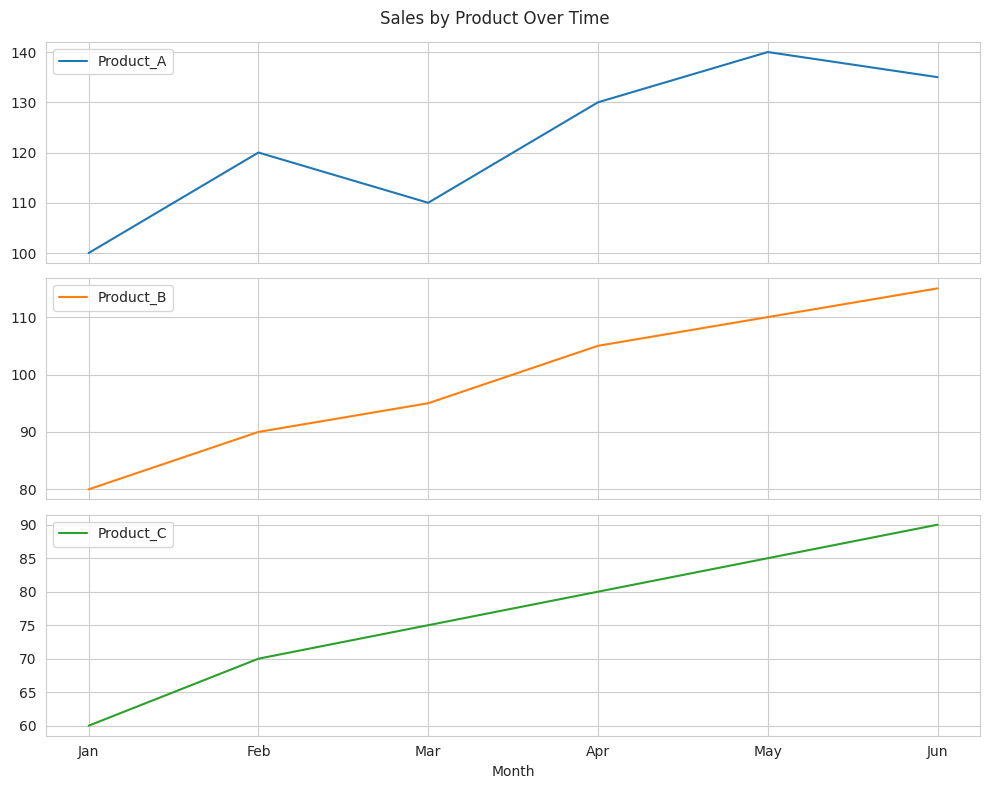

In [5]:
# Sales data example
sales_data = pd.DataFrame({
    'Month': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'],
    'Product_A': [100, 120, 110, 130, 140, 135],
    'Product_B': [80, 90, 95, 105, 110, 115],
    'Product_C': [60, 70, 75, 80, 85, 90]
})

# Set Month as index for better plotting
sales_data.set_index('Month', inplace=True)

# Create subplots for each product
sales_data.plot(subplots=True, figsize=(10, 8), 
                title='Sales by Product Over Time',
                grid=True, legend=True)
plt.tight_layout()
plt.show()

## Part 2: seaborn Statistical Visualization

seaborn builds on matplotlib to provide beautiful statistical visualizations with minimal code.

### Basic seaborn Plots

seaborn excels at statistical plots with automatic styling.

/tmp/ipykernel_1426218/898619833.py:22: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_data = tips.pivot_table(values='tip', index='day', columns='time')


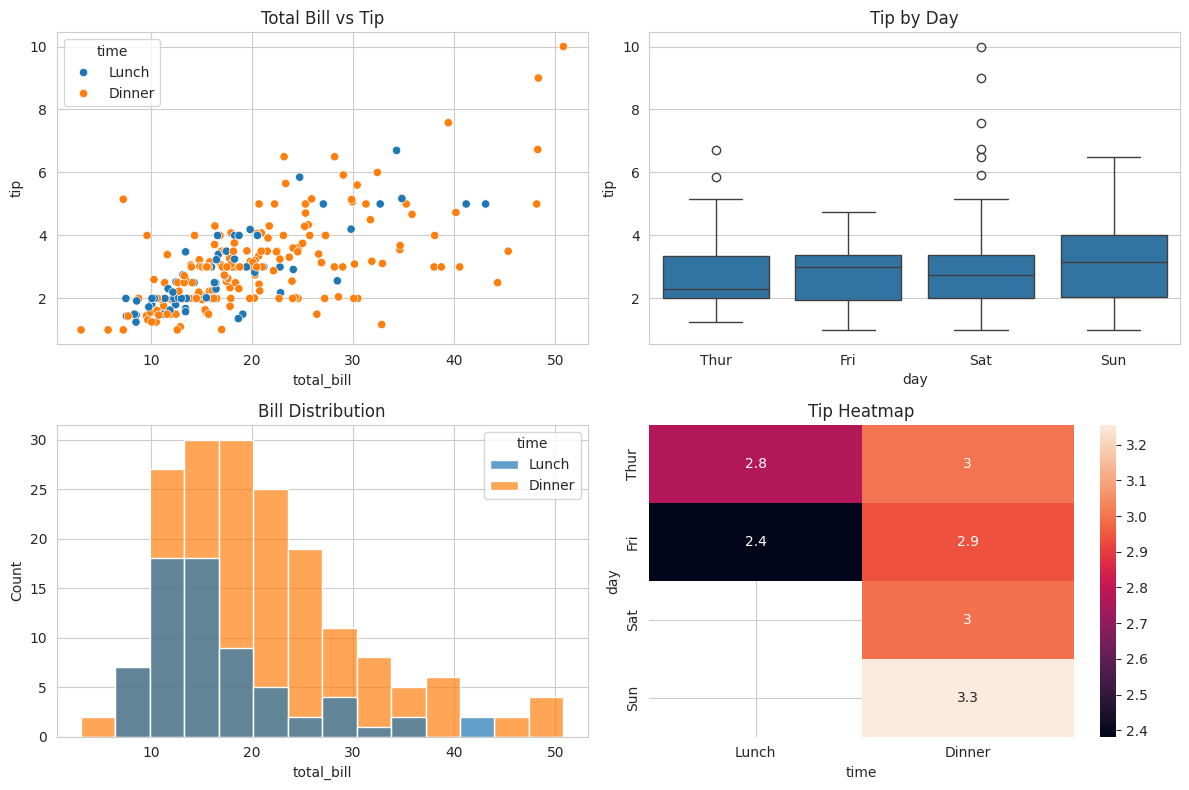

In [6]:
# Load sample dataset
tips = sns.load_dataset('tips')

# Create multiple plots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Scatter plot
sns.scatterplot(data=tips, x='total_bill', y='tip', 
                hue='time', ax=axes[0, 0])
axes[0, 0].set_title('Total Bill vs Tip')

# Box plot
sns.boxplot(data=tips, x='day', y='tip', ax=axes[0, 1])
axes[0, 1].set_title('Tip by Day')

# Histogram
sns.histplot(data=tips, x='total_bill', hue='time', 
             alpha=0.7, ax=axes[1, 0])
axes[1, 0].set_title('Bill Distribution')

# Heatmap
pivot_data = tips.pivot_table(values='tip', index='day', columns='time')
sns.heatmap(pivot_data, annot=True, ax=axes[1, 1])
axes[1, 1].set_title('Tip Heatmap')

plt.tight_layout()
plt.show()

### Advanced seaborn Features

seaborn provides specialized statistical plots for deeper analysis.

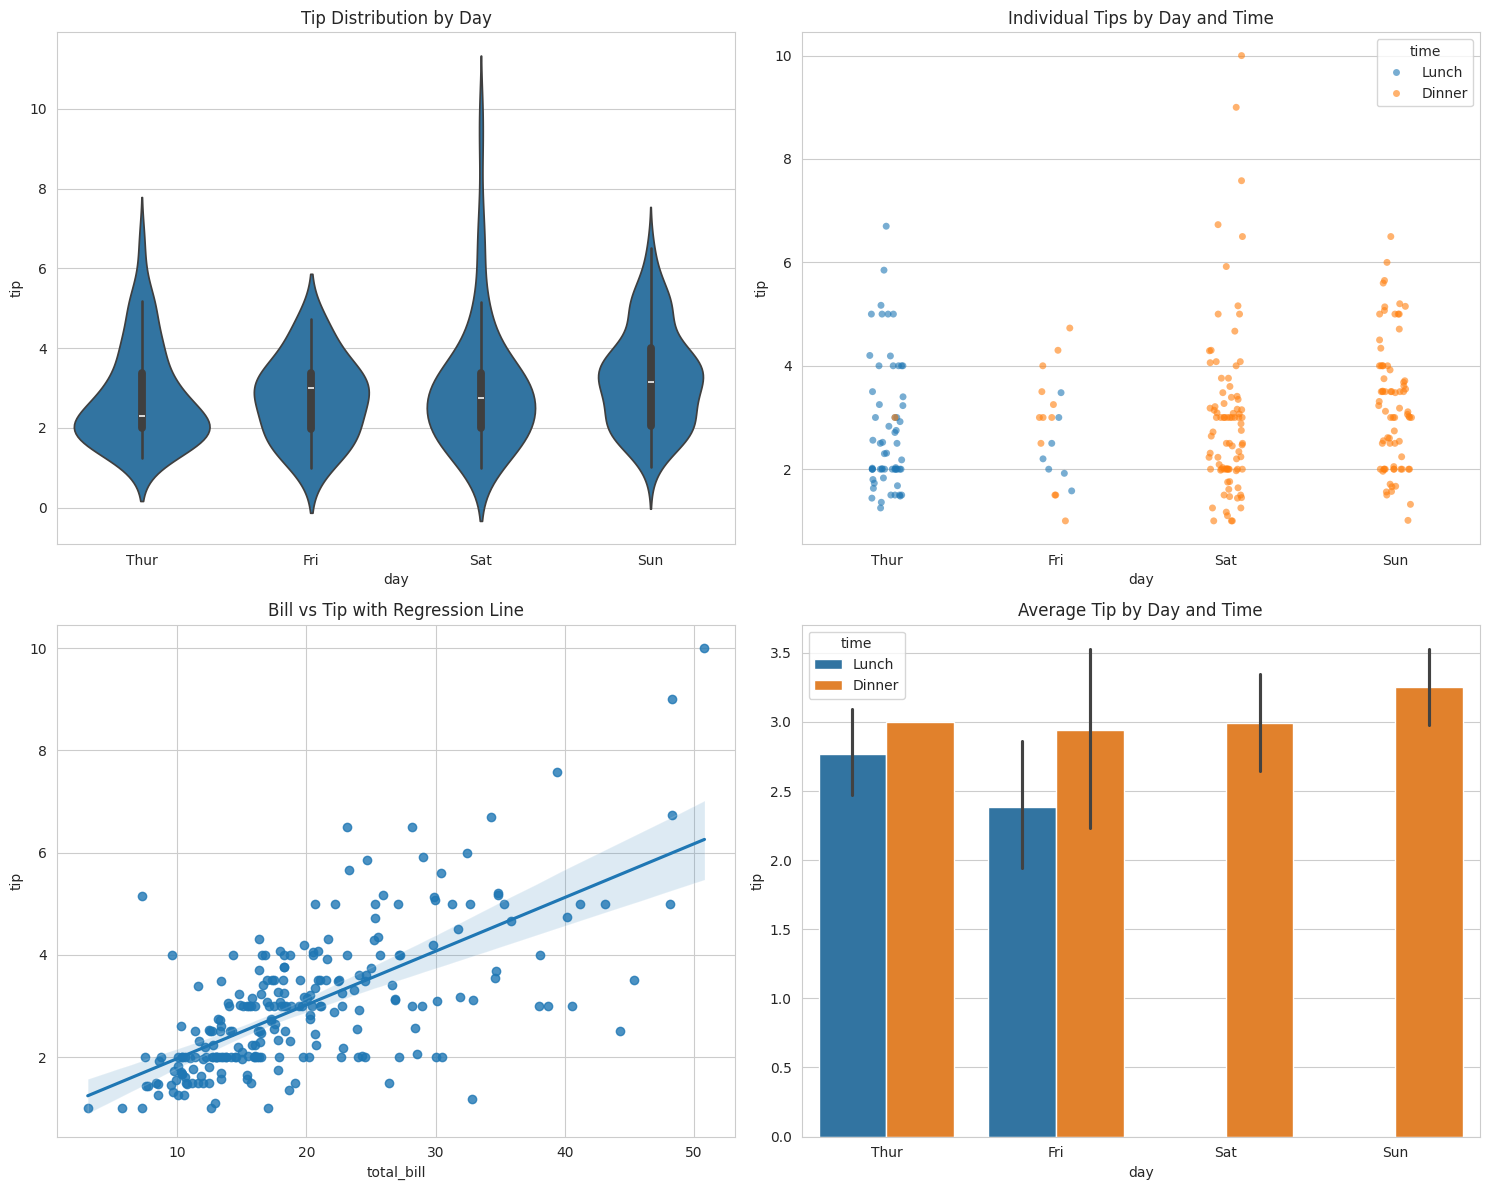

In [7]:
# Advanced seaborn visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Violin plot (shows distribution shape)
sns.violinplot(data=tips, x='day', y='tip', ax=axes[0, 0])
axes[0, 0].set_title('Tip Distribution by Day')

# Strip plot (shows individual points)
sns.stripplot(data=tips, x='day', y='tip', hue='time', 
              ax=axes[0, 1], alpha=0.6)
axes[0, 1].set_title('Individual Tips by Day and Time')

# Regression plot
sns.regplot(data=tips, x='total_bill', y='tip', ax=axes[1, 0])
axes[1, 0].set_title('Bill vs Tip with Regression Line')

# Categorical plot
sns.barplot(data=tips, x='day', y='tip', hue='time', ax=axes[1, 1])
axes[1, 1].set_title('Average Tip by Day and Time')

plt.tight_layout()
plt.show()

### Pair Plots and Joint Plots

seaborn excels at showing relationships between multiple variables.

#### Basic Pair Plot

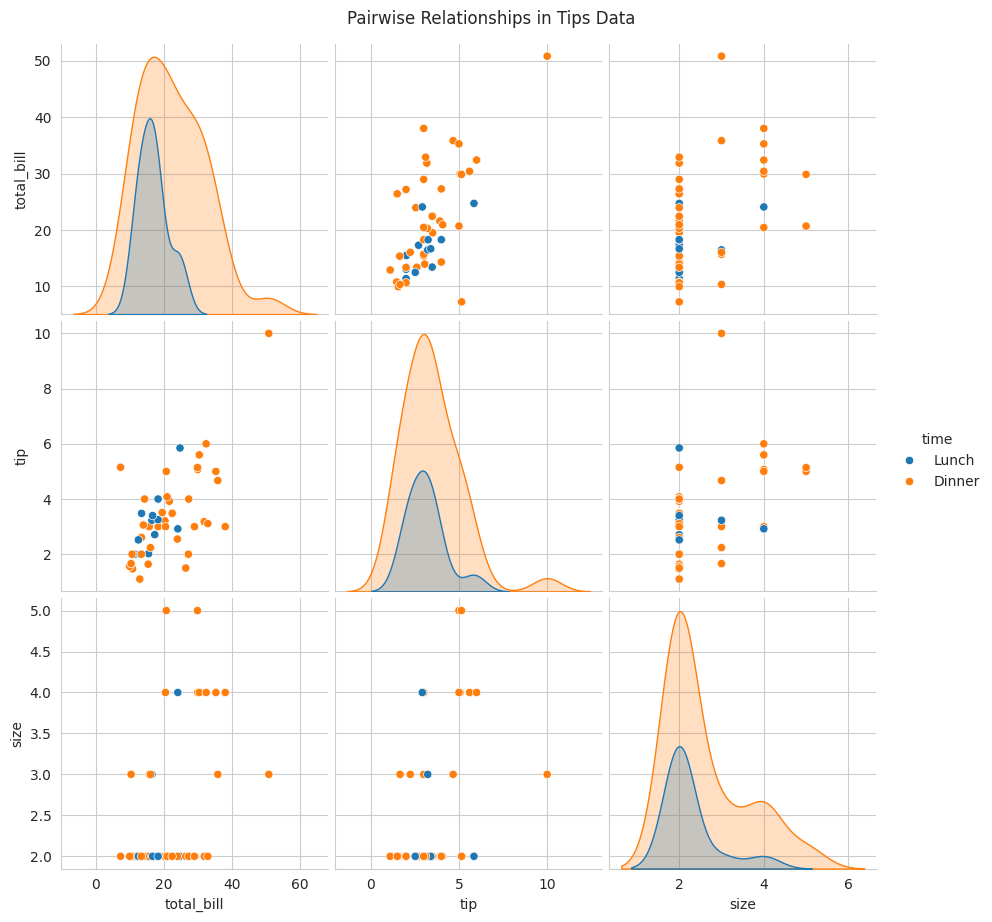

In [8]:
# Pair plot (shows all pairwise relationships)
sample_data = tips.sample(50)  # Use subset for clarity
sns.pairplot(sample_data, hue='time', height=3)
plt.suptitle('Pairwise Relationships in Tips Data', y=1.02)
plt.show()

#### Advanced Pair Plot Options

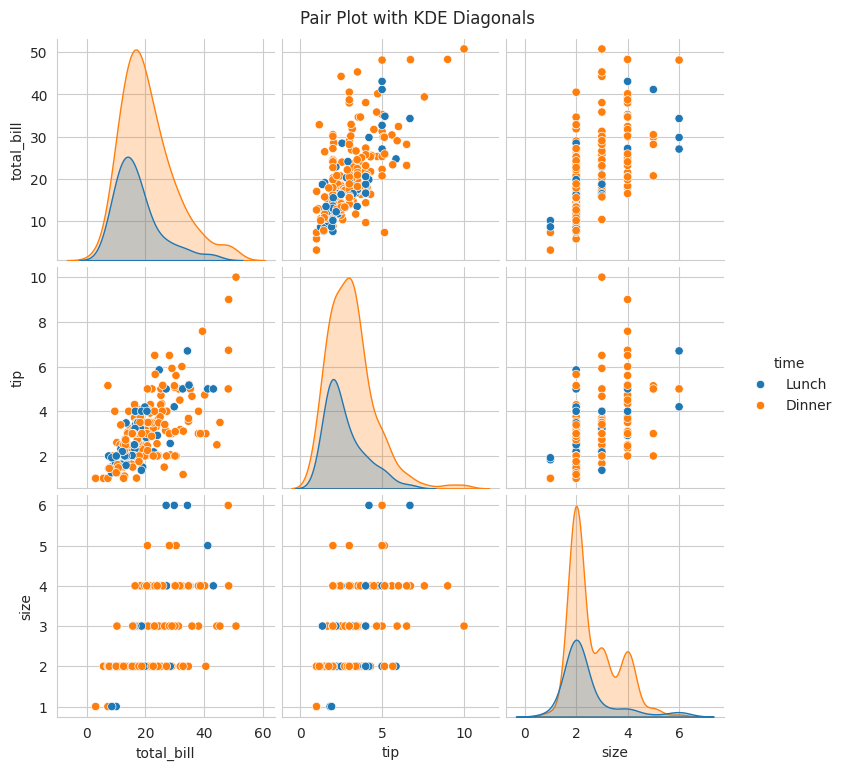

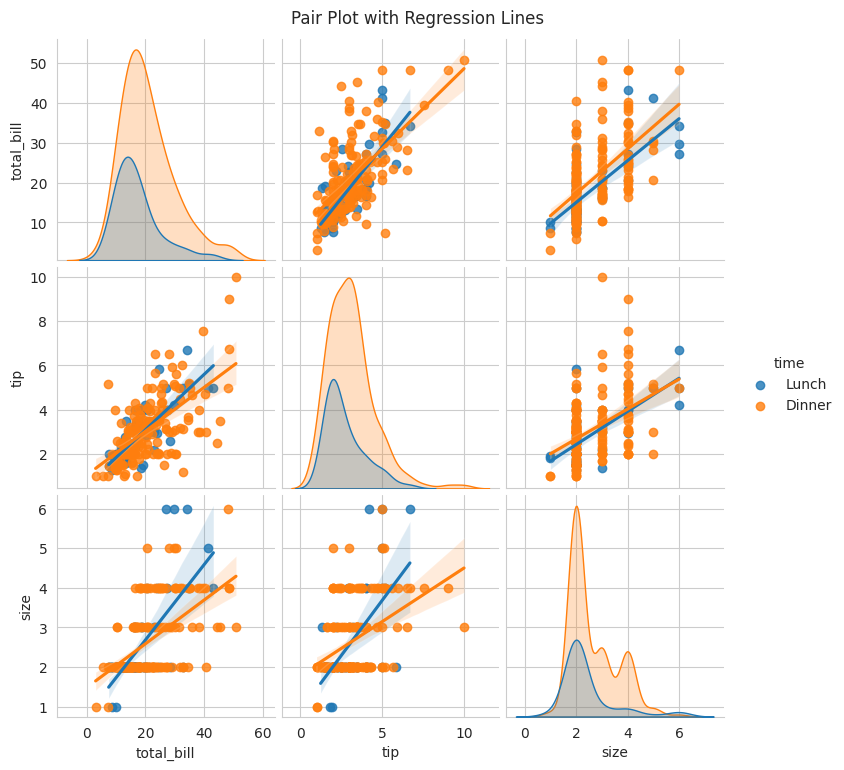

In [9]:
# Pair plot with different diagonal plots
sns.pairplot(tips, hue='time', diag_kind='kde', height=2.5)
plt.suptitle('Pair Plot with KDE Diagonals', y=1.02)
plt.show()

# Pair plot with regression lines
sns.pairplot(tips, hue='time', kind='reg', height=2.5)
plt.suptitle('Pair Plot with Regression Lines', y=1.02)
plt.show()

#### Joint Plots

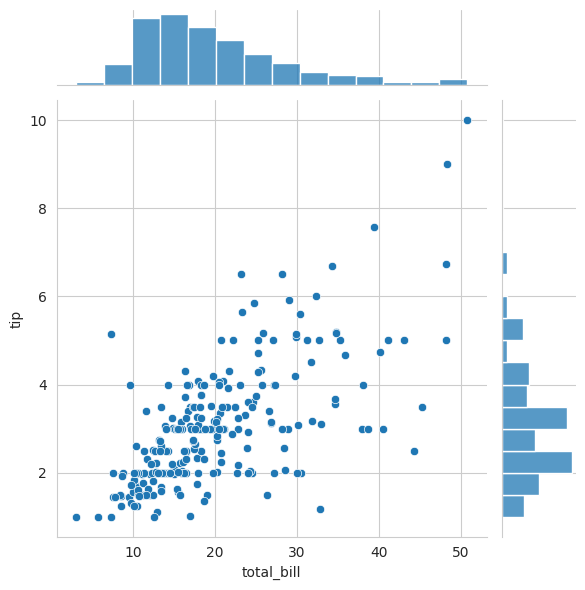

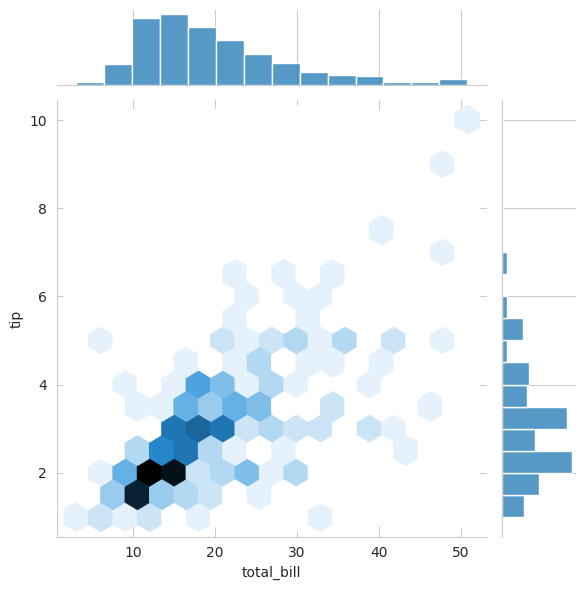

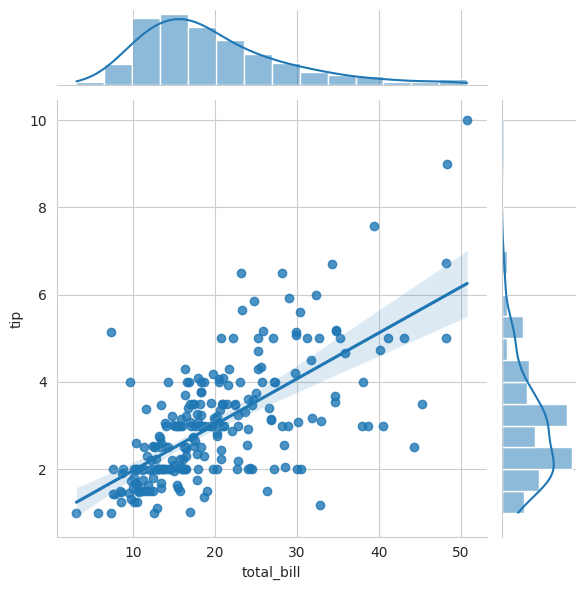

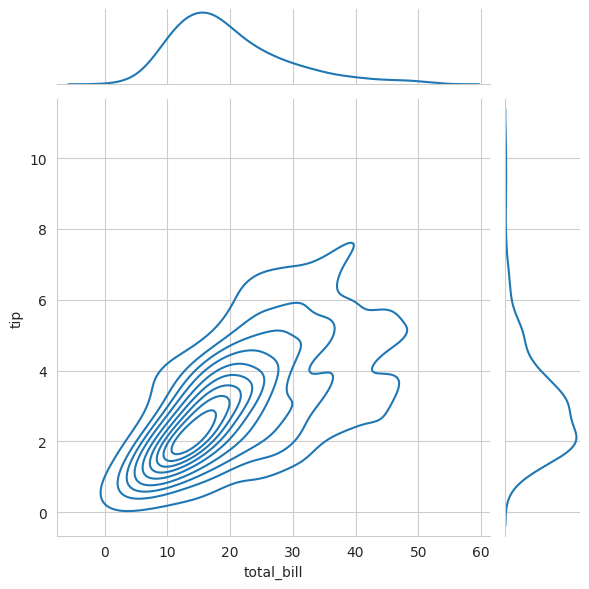

In [14]:
# Scatter + histograms
sns.jointplot(data=tips, x='total_bill', y='tip')

# Hexbin plot
sns.jointplot(data=tips, x='total_bill', y='tip', kind='hex')

# Regression plot
sns.jointplot(data=tips, x='total_bill', y='tip', kind='reg')

# KDE plot
sns.jointplot(data=tips, x='total_bill', y='tip', kind='kde')

plt.tight_layout()
plt.show()

### Styling and Themes

seaborn provides built-in themes and color palettes.

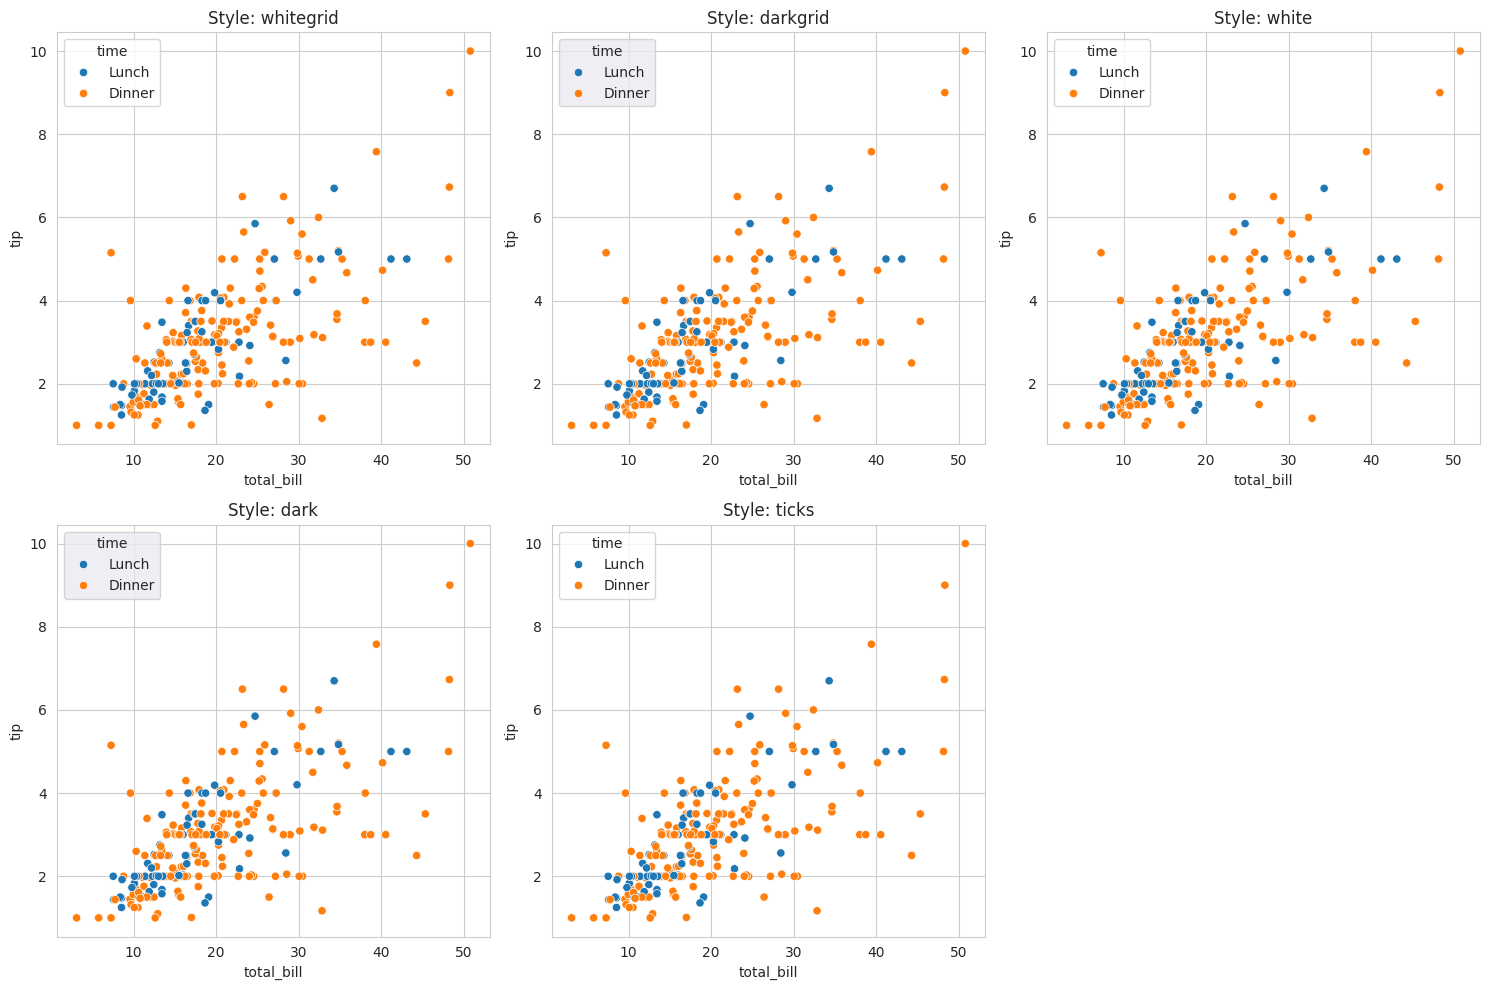

In [11]:
# Different seaborn styles
styles = ['whitegrid', 'darkgrid', 'white', 'dark', 'ticks']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, style in enumerate(styles):
    sns.set_style(style)
    sns.scatterplot(data=tips, x='total_bill', y='tip', 
                    hue='time', ax=axes[i])
    axes[i].set_title(f'Style: {style}')

# Remove extra subplot
fig.delaxes(axes[5])

plt.tight_layout()
plt.show()

# Reset to default
sns.set_style('whitegrid')

## Key Takeaways

1. **pandas plotting**: Perfect for quick data exploration and basic visualizations
2. **seaborn**: Ideal for statistical analysis and beautiful default styling
3. **Workflow**: Start with pandas for exploration, use seaborn for analysis
4. **Styling**: seaborn provides consistent themes and color palettes
5. **Statistical plots**: seaborn excels at showing distributions and relationships